### generate figures and label images for HIOS TDS manuscript

### figS2 (simulated MoS2 data)
* simulated with "..\data\MoS2 layer simulation.py"

Package versions:<br>
python==3.10.8<br>
numpy==1.23.5<br>
matplotlib==3.6.2<br>
ipywidgets==8.0.4<br>
pickleshare==0.7.5

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import glob
import matplotlib as matplotlib
import matplotlib.pyplot as plt
#from matplotlib.widgets import Slider, Button
import ipywidgets as widgets

from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from datetime import datetime
import pickle

In [3]:
# load simulated data
data_folder = r"..\data\Figure S2"
data_name_mono = r"\4DSTEM_MoS2_mono_simulation.npy"
data_name_double = r"\4DSTEM_MoS2_double_simulation.npy"
data_name_tri = r"\4DSTEM_MoS2_tri_simulation.npy"
data_path = data_folder

In [4]:
figsize_w = 15/2.54
fontsize = 12
dpi = 640

In [5]:
angle_rad = 120./1000. #120 mrad
angle_pixel = 187./2. # pixel
angel_radppixel = angle_rad/angle_pixel

In [6]:
angel_radppixel

0.0012834224598930481

In [7]:
def wavelen(U): # wavelength in nm, U in kV
    U *= 1000
    h = 6.6260e-34 #Nm/s
    m_0 = 9.10938356*10**-31 #kg
    e = 1.6021766208*10**-19 # As
    # U = 30000 #V Nm/As
    c = 299792458 #m/s
    wlen = h/np.sqrt(2*m_0*e*U + (e*U/c)**2)
    return wlen*1e9

In [8]:
cam_pixel_size = angel_radppixel/wavelen(20)
cam_pixel_size # nm^-1

0.14943636984176173

In [9]:
data_mono = np.load(data_path + data_name_mono)
data_double = np.load(data_path + data_name_double)
data_tri = np.load(data_path + data_name_tri)

In [10]:
data_shape = data_mono.shape
data_shape

(15, 15, 187, 187)

In [11]:
data_mono_sum = np.sum(data_mono, axis=(0,1))
data_double_sum = np.sum(data_double, axis=(0,1))
data_tri_sum = np.sum(data_tri, axis=(0,1))

In [12]:
# normalize data
data_mono_sum = data_mono_sum/np.max(data_mono_sum)
data_double_sum = data_double_sum/np.max(data_double_sum)
data_tri_sum = data_tri_sum/np.max(data_tri_sum)

In [13]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

In [14]:
# radially integrate intensity
data_mono_sum_radial = radial_profile(data_mono_sum, (data_mono_sum.shape[0]/2, data_mono_sum.shape[1]/2))
data_mono_sum_radial = data_mono_sum_radial/np.max(data_mono_sum_radial)
data_double_sum_radial = radial_profile(data_double_sum, (data_double_sum.shape[0]/2, data_double_sum.shape[1]/2))
data_double_sum_radial = data_double_sum_radial/np.max(data_double_sum_radial)
data_tri_sum_radial = radial_profile(data_tri_sum, (data_tri_sum.shape[0]/2, data_tri_sum.shape[1]/2))
data_tri_sum_radial = data_tri_sum_radial/np.max(data_tri_sum_radial)

kx = np.arange(data_mono_sum_radial.shape[0])*cam_pixel_size

(0.0, 1.0, 0.0, 1.0)

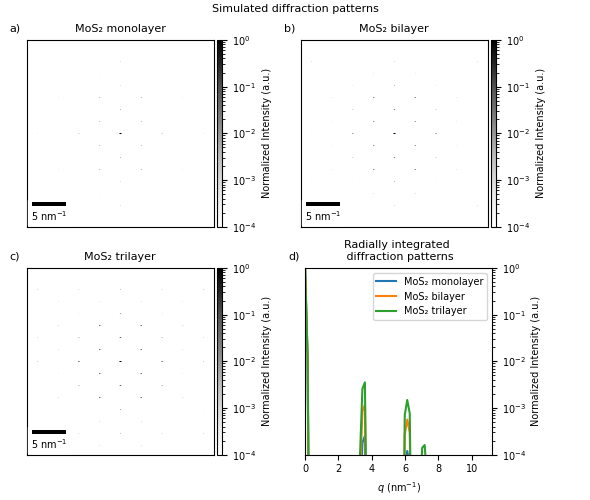

In [15]:
#generate plots for manuscript
colorbar_pad = 0.03
fs0 = 7
fs1 = 8
suplots_blank_size = 0.15
suplots_blank_size_right = suplots_blank_size

xy_pos = (-0.09,1.09)
param1 = {'textcoords': 'axes fraction', 'horizontalalignment': 'left', 'verticalalignment':'top', 'fontsize': fs1,
          'bbox':dict(boxstyle="square,pad=0.0", fc="w", ec="w", lw=2)} #axes points

fig, ((ax1,ax01,ax2,ax02),(ax3,ax03,ax4,ax04)) = plt.subplots(2,4,figsize = (figsize_w,5), 
                                  gridspec_kw={'height_ratios': [1,1], 'width_ratios': [1,suplots_blank_size,1,suplots_blank_size_right]}, 
                                  constrained_layout=True # facecolor = 'gray'
                                 )
fig.suptitle('Simulated diffraction patterns', fontsize = fs1)
im1 = ax1.imshow(data_mono_sum, norm=matplotlib.colors.LogNorm(vmin = 10**-4), cmap = 'Greys')
#
scalebar1 = ScaleBar(cam_pixel_size, '1/nm', dimension="si-length-reciprocal", 
                     location = 'lower left',sep = 2, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
ax1.add_artist(scalebar1)
#
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="3%", pad = colorbar_pad) #
cbar1 = plt.colorbar(im1, cax = cax1)
cbar1.ax.tick_params(labelsize=fs0)
cbar1.set_label(label = 'Normalized Intensity (a.u.)',size=fs0)
#
ax1.set_title('MoS\u2082 monolayer', fontsize = fs1)
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.annotate('a)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)



im2 = ax2.imshow(data_double_sum, norm=matplotlib.colors.LogNorm(vmin = 10**-4), cmap = 'Greys')
#
scalebar2 = ScaleBar(cam_pixel_size, '1/nm', dimension="si-length-reciprocal", 
                     location = 'lower left',sep = 2, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
ax2.add_artist(scalebar2)
#
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="3%", pad = colorbar_pad) #
cbar2 = plt.colorbar(im2, cax = cax2)
cbar2.ax.tick_params(labelsize=fs0)
cbar2.set_label(label = 'Normalized Intensity (a.u.)',size=fs0)
#
ax2.set_title('MoS\u2082 bilayer', fontsize = fs1)
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.annotate('b)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)

im3 = ax3.imshow(data_tri_sum, norm=matplotlib.colors.LogNorm(vmin = 10**-4), cmap = 'Greys')
#
scalebar3 = ScaleBar(cam_pixel_size, '1/nm', dimension="si-length-reciprocal", 
                     location = 'lower left',sep = 2, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
ax3.add_artist(scalebar3)
#
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes("right", size="3%", pad = colorbar_pad) #
cbar3 = plt.colorbar(im3, cax = cax3)
cbar3.ax.tick_params(labelsize=fs0)
cbar3.set_label(label = 'Normalized Intensity (a.u.)',size=fs0)
#
ax3.set_title('MoS\u2082 trilayer', fontsize = fs1)
ax3.grid(False)
ax3.set_xticks([])
ax3.set_yticks([])
#ax3.axis('off')
ax3.annotate('c)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)


im4_0 = ax4.plot(kx,data_mono_sum_radial, label='MoS\u2082 monolayer')
im4_1 = ax4.plot(kx,data_double_sum_radial, label='MoS\u2082 bilayer')
im4_2 = ax4.plot(kx,data_tri_sum_radial, label='MoS\u2082 trilayer')

ax4.annotate('d)', xy = (0.1,1), xytext = (xy_pos[0], xy_pos[1]), **param1)

ax4.set_ylim((10**-4,1))
ax4.set_xlim((0,75*cam_pixel_size))
ax4.legend(fontsize = fs0)
ax4.set_title('Radially integrated \n diffraction patterns', fontsize = fs1)
ax4.set_ylabel('Normalized Intensity (a.u.)', fontsize = fs0)
ax4.set_xlabel("$q$ (nm$^{-1}$)", fontsize = fs0)
ax4.tick_params(labelsize=fs0)
ax4.set_yscale("log")
asp = np.diff(ax4.get_xlim())[0] / np.diff(ax4.get_ylim())[0]
ax4.set_aspect(asp/4)
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")


ax01.axis('off')
ax02.axis('off')
ax03.axis('off')
ax04.axis('off')

In [16]:
date_str = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig('figS2_' + date_str + '.png',dpi = dpi,bbox_inches = "tight")

In [17]:
# check if there is a significant difference between the intensity in the diffraction orders for different number of layers

In [18]:
data_mono_sum_radial[np.where(data_mono_sum_radial < 10**-7)] = 0.0
data_double_sum_radial[np.where(data_double_sum_radial < 10**-7)] = 0.0
data_tri_sum_radial[np.where(data_tri_sum_radial < 10**-7)] = 0.0

In [19]:
data_tri_sum_radial[20:52]

array([0.00000000e+00, 0.00000000e+00, 8.53711977e-05, 2.58480678e-03,
       3.54605613e-03, 1.56588988e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.07262419e-04, 1.48887168e-03, 7.69873077e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.19182390e-05, 1.41130764e-04,
       1.61672312e-04, 2.43257114e-05, 0.00000000e+00, 0.00000000e+00])

In [20]:
(np.sum(data_mono_sum_radial[19:30])/6.)/(np.sum(data_mono_sum_radial[39:44])/6.)

1.8323986331668718

In [21]:
(np.sum(data_double_sum_radial[19:30])/6.)/(np.sum(data_double_sum_radial[39:44])/6.)

1.8163515846040417

In [22]:
(np.sum(data_tri_sum_radial[19:30])/6)/(np.sum(data_tri_sum_radial[39:44])/12)

4.191757011060963

In [23]:
(np.sum(data_mono_sum_radial[19:30])/6)/(np.sum(data_mono_sum_radial[45:51])/12)

24.29517931760508

In [24]:
(np.sum(data_double_sum_radial[19:30])/6)/(np.sum(data_double_sum_radial[45:51])/12)

26.569349092815408

In [25]:
(np.sum(data_tri_sum_radial[19:30])/6)/(np.sum(data_tri_sum_radial[45:51])/12)

36.66978447453926